In [1]:
!pip install lifelines
!pip install datascience
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lifelines
import seaborn as sns

In [2]:
data = pd.read_csv('FriendlyHomeData_csv.csv', index_col=[0])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 41573 to 41573
Data columns (total 17 columns):
Employee ID                        1284 non-null object
Hire Date                          1284 non-null object
Rehire Date                        56 non-null object
Termination Date                   873 non-null object
Employee Status                    1284 non-null object
Age (Years)                        1284 non-null int64
Age (Decades)                      1284 non-null int64
Gender                             1279 non-null object
Termination Reason                 1284 non-null object
Termination Reason Category (1)    873 non-null object
Termination Reason Category (2)    873 non-null object
Job Title                          1282 non-null object
Department                         1282 non-null object
Duration (Days)                    1284 non-null int64
Duration (Months)                  1284 non-null int64
Duration (Years)                   1284 non-null int64
Le

In [4]:
data.describe()

,Age (Years),Age (Decades),Duration (Days),Duration (Months),Duration (Years),Leave_1_Stay_0
count,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000
mean,38.853583,34.400312,1645.638629,54.862150,4.478193,0.679907
std,14.621663,14.920894,2623.247792,87.452883,7.222140,0.466694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,20.000000,116.500000,4.000000,0.000000,0.000000
50%,35.000000,30.000000,527.500000,18.000000,1.000000,1.000000
75%,50.000000,50.000000,1829.000000,61.000000,5.000000,1.000000
max,82.000000,80.000000,17620.000000,587.000000,48.000000,1.000000


C:\Users\yeink\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Text(0, 0.5, 'Number of Employees')

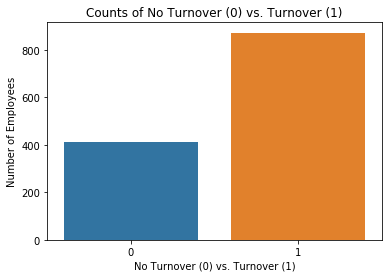

In [5]:
sns.countplot(data.Leave_1_Stay_0)
leave = data[data["Leave_1_Stay_0"]=="1"].shape[0]
noleave = data[data["Leave_1_Stay_0"]=="0"].shape[0]
plt.title('Counts of No Turnover (0) vs. Turnover (1)')
plt.xlabel('No Turnover (0) vs. Turnover (1)')
plt.ylabel('Number of Employees')

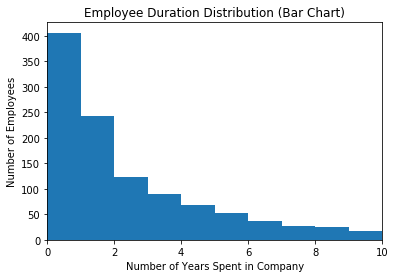

In [6]:
time_spent = data.groupby('Duration (Years)').count()
plt.bar(time_spent.index.values, time_spent['Employee ID'], width=2, )
plt.xlim(0,10)
plt.xlabel('Number of Years Spent in Company')
plt.ylabel('Number of Employees')
plt.title('Employee Duration Distribution (Bar Chart)')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

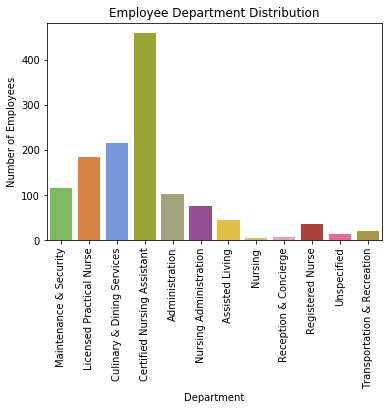

In [7]:
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

sns.countplot(x='Department', data=data, palette=color_types).set_title('Employee Department Distribution');
plt.ylabel('Number of Employees') 
plt.xticks(rotation=90)

Text(0.5, 0, 'Number of Employees')

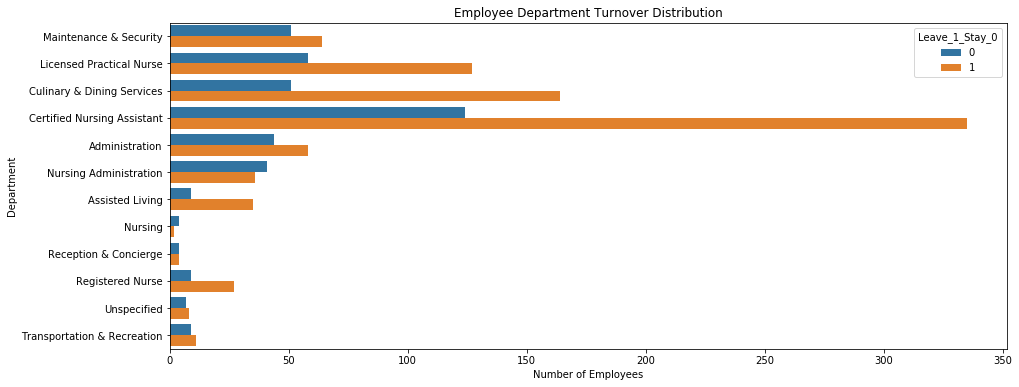

In [8]:
f, ax = plt.subplots(figsize=(15, 6))
sns.countplot(y="Department", hue='Leave_1_Stay_0', data=data).set_title('Employee Department Turnover Distribution');
plt.xlabel('Number of Employees')

Text(0.5, 1.0, 'Employee Age Distribution - Turnover vs. No Turnover')

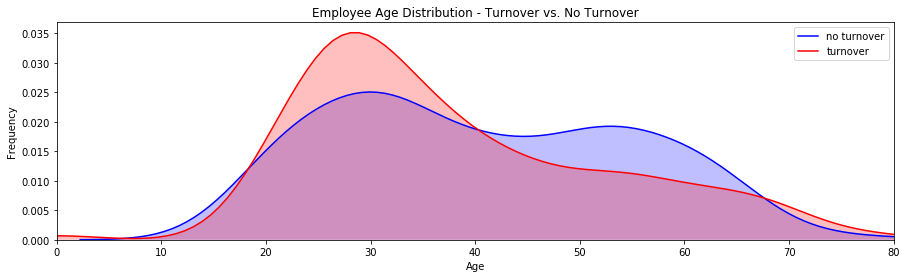

In [9]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(data.loc[(data['Leave_1_Stay_0'] == 0),'Age (Years)'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(data.loc[(data['Leave_1_Stay_0'] == 1),'Age (Years)'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Age', ylabel='Frequency')
plt.xlim(0, 80)
plt.title('Employee Age Distribution - Turnover vs. No Turnover')

Text(0.5, 1.0, 'Employee Duration Distribution - Turnover vs. No Turnover')

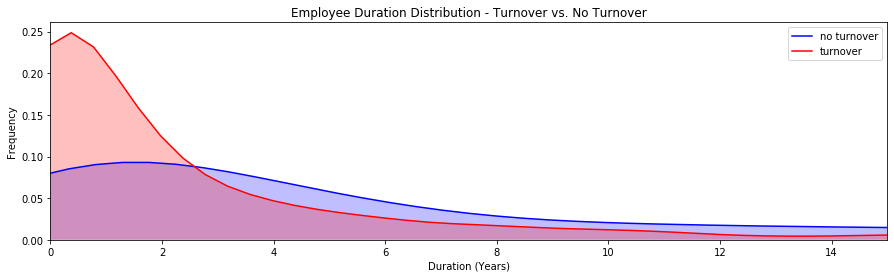

In [10]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(data.loc[(data['Leave_1_Stay_0'] == 0),'Duration (Years)'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(data.loc[(data['Leave_1_Stay_0'] == 1),'Duration (Years)'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Duration (Years)', ylabel='Frequency')
plt.xlim(0, 15)
plt.title('Employee Duration Distribution - Turnover vs. No Turnover')

Text(0.5, 1.0, 'Employee Duration Distribution - Turnover vs. No Turnover')

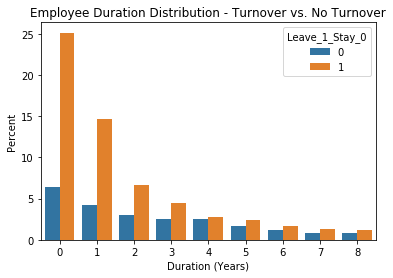

In [11]:
ax = sns.barplot(x="Duration (Years)", y="Duration (Years)", hue="Leave_1_Stay_0", data=data, estimator=lambda x: len(x) / len(data) * 100)
plt.xlim(-0.5,8.5)
ax.set(ylabel="Percent")
plt.title('Employee Duration Distribution - Turnover vs. No Turnover')

In [12]:
from lifelines import KaplanMeierFitter

In [13]:
kmf = KaplanMeierFitter()

In [14]:
T = data['Duration (Years)']
C = data['Leave_1_Stay_0']

In [15]:
kmf.fit(T,C)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1284 total observations, 411 right-censored observations>

In [16]:
%pylab inline
figsize(12,6)

Populating the interactive namespace from numpy and matplotlib


C:\Users\yeink\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0, 0.5, 'Survival Probability (%)')

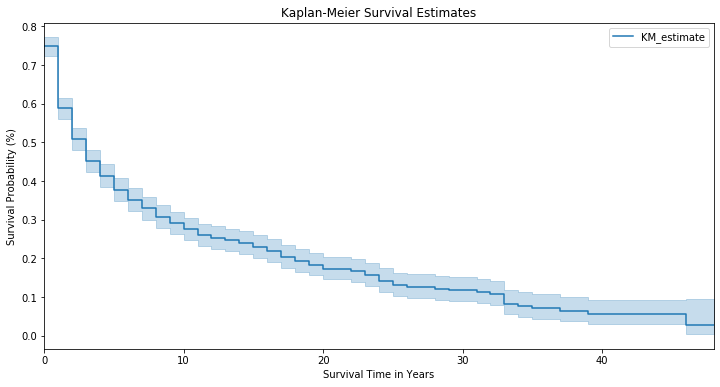

In [17]:
kmf.plot()
plt.title('Kaplan-Meier Survival Estimates')
plt.xlabel('Survival Time in Years')
plt.ylabel('Survival Probability (%)')

(0, 25)

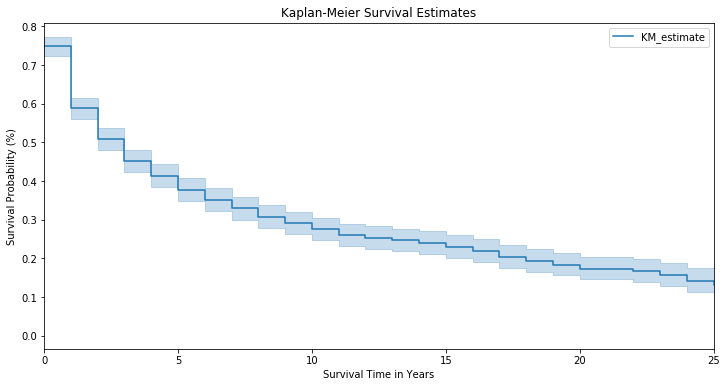

In [18]:
kmf.plot()
plt.title('Kaplan-Meier Survival Estimates')
plt.xlabel('Survival Time in Years')
plt.ylabel('Survival Probability (%)')
plt.xlim(0,25)

C:\Users\yeink\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


(0, 25)

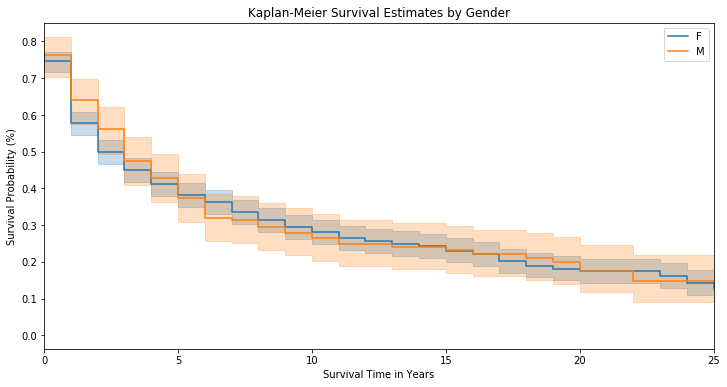

In [19]:
ax = subplot(111)

for r in data['Gender'].unique()[:2]:
    ix = data['Gender'] == r
    kmf.fit(T.ix[ix],C.ix[ix],label = r)
    ax = kmf.plot(ax = ax)

plt.title('Kaplan-Meier Survival Estimates by Gender')
plt.xlabel('Survival Time in Years')
plt.ylabel('Survival Probability (%)')
plt.xlim(0,25)

C:\Users\yeink\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


(0, 25)

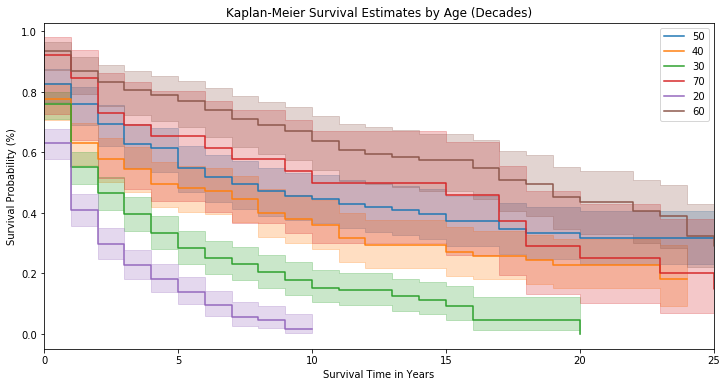

In [34]:
ax = subplot(111)

for r in data['Age (Decades)'].unique()[:6]:
    ix = data['Age (Decades)'] == r
    kmf.fit(T.ix[ix],C.ix[ix],label = r)
    ax = kmf.plot(ax = ax)

plt.title('Kaplan-Meier Survival Estimates by Age (Decades)')
plt.xlabel('Survival Time in Years')
plt.ylabel('Survival Probability (%)')
plt.xlim(0,25)

C:\Users\yeink\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


(0, 25)

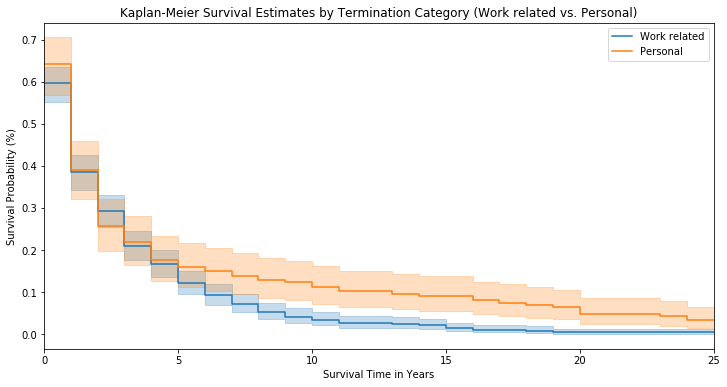

In [20]:
ax = subplot(111)

for r in data['Termination Reason Category (1)'].unique()[:2]:
    ix = data['Termination Reason Category (1)'] == r
    kmf.fit(T.ix[ix],C.ix[ix],label = r)
    ax = kmf.plot(ax = ax)
    
plt.title('Kaplan-Meier Survival Estimates by Termination Category (Work related vs. Personal)')
plt.xlabel('Survival Time in Years')
plt.ylabel('Survival Probability (%)')
plt.xlim(0,25)

C:\Users\yeink\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


(0, 25)

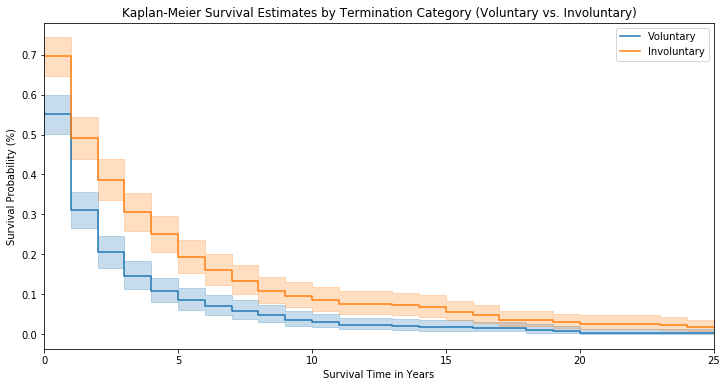

In [21]:
ax = subplot(111)

for r in data['Termination Reason Category (2)'].unique()[:2]:
    ix = data['Termination Reason Category (2)'] == r
    kmf.fit(T.ix[ix],C.ix[ix],label = r)
    ax = kmf.plot(ax = ax)
    
plt.title('Kaplan-Meier Survival Estimates by Termination Category (Voluntary vs. Involuntary)')
plt.xlabel('Survival Time in Years')
plt.ylabel('Survival Probability (%)')
plt.xlim(0,25)

C:\Users\yeink\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


(0, 25)

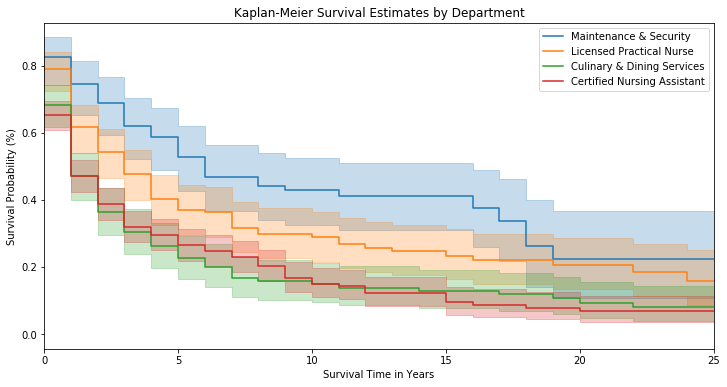

In [22]:
ax = subplot(111)

for r in data['Department'].unique()[:4]:
    ix = data['Department'] == r
    kmf.fit(T.ix[ix],C.ix[ix],label = r)
    ax = kmf.plot(ax = ax)
plt.title('Kaplan-Meier Survival Estimates by Department')
plt.xlabel('Survival Time in Years')
plt.ylabel('Survival Probability (%)')
plt.xlim(0,25)

C:\Users\yeink\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


(0, 25)

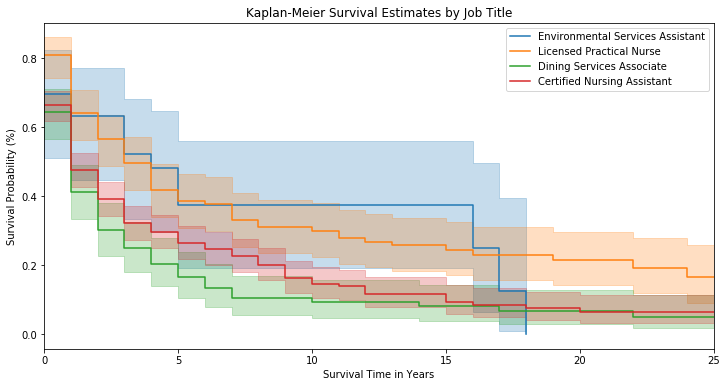

In [23]:
ax = subplot(111)

for r in data['Job Title'].unique()[:4]:
    ix = data['Job Title'] == r
    kmf.fit(T.ix[ix],C.ix[ix],label = r)
    ax = kmf.plot(ax = ax)

plt.title('Kaplan-Meier Survival Estimates by Job Title')
plt.xlabel('Survival Time in Years')
plt.ylabel('Survival Probability (%)')
plt.xlim(0,25)